In [1]:
# imports
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.plotting import plot
from sympy import symbols

In [2]:
# config / constants
a, b, c, x, y, z, i, j, n, m = sp.symbols('a b c x y z i j n m', real=True)

# Chapter 8 Excercises

-------------------------

#### 8.2.3 Prove that $a_n = \frac{2^{\sqrt(n)}}{n^{10}}$ diverges

In [3]:
n = sp.symbols('n', integer=True)

an = 2**sp.sqrt(n) / n**10

sp.limit(an, n, sp.oo)

oo

In [4]:
n = sp.symbols('n', positive=True, integer=True)

L = sp.log(2)*sp.sqrt(n) - 10*sp.log(n)

sp.limit(L, n, sp.oo)

oo

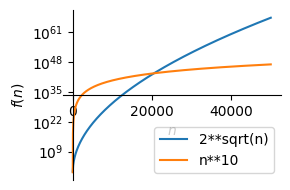

In [5]:
n = sp.symbols('n', positive=True)

a = 2**sp.sqrt(n)
b = n**10

p = plot(
    (a, (n, 1, 50000), "2**sqrt(n)"),
    (b, (n, 1, 50000), "n**10"),
    yscale='log',
    show=False,
    size=(3,2)
)
p.legend = True
p.show()

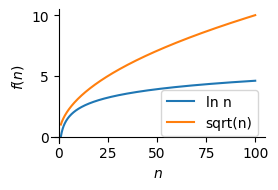

In [6]:
a = sp.log(n)
b = sp.sqrt(n)

p = plot(
    (a, (n, 1, 100), "ln n"),
    (b, (n, 1, 100), "sqrt(n)"),
    show=False,
    size=(3,2)
)
p.legend = True
p.show()

---------------------------------

#### 8.3 Compute the Taylor series for *$f(x) = 1/x$ around $x = 1$*

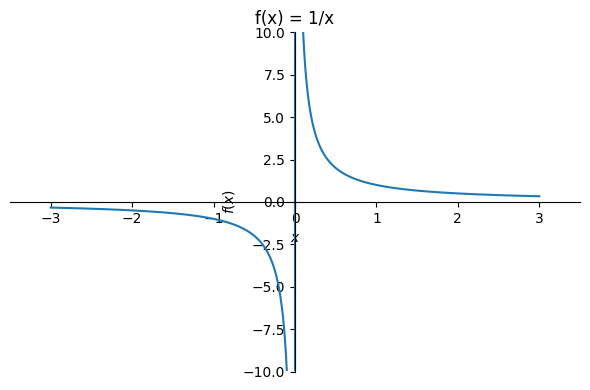

In [7]:
x = sp.symbols('x', real=True)

f = 1/x

p = plot(f, (x, -3, 3), title="f(x) = 1/x", show=True, size=(6,4), xlim=(-3.5, 3.5), ylim=(-10, 10), axis_center=(0,0))

In [8]:
f.series(x, 1, 5)

2 + (x - 1)**2 - (x - 1)**3 + (x - 1)**4 - x + O((x - 1)**5, (x, 1))

*Now the point of this exercise may have been to recognize the geometric series and take advantag of that fact.*

Let $f(x) = \frac{1}{x}$ and compute the taylor series around $x = 1$

Rewrite around the center $x = 1$

let $h = x - 1$ (so $x = 1 + h$)

Then:
$$
\frac{1}{x} = \frac{1}{1 + h}
$$

Use the geometric series for h < 1

$$
\frac{1}{x} = \frac{1}{1 + h} = \frac{1}{x} = \frac{1}{1 - (1 - h}) = \sum_{n=0}^{\infty} (-h)^n
$$

So:
$$
\frac{1}{1 + h} = 1 - h + h^2 -h^3 +h^4
$$

Substitute back $h = x - 1$

$$
\frac{1}{x} = \sum_{n=0}^{\infty} (-1)^n(x-1)^n = 1 - (x - 1) + (x - 1)^2 - (x - 1)^3
$$

In [9]:
a, r, x = sp.symbols('a r x', real=True)

S = 1/(1 - r)
S.series(r).subs(a, 1)

1 + r + r**2 + r**3 + r**4 + r**5 + O(r**6)

In [10]:
S.series(r, 0, 5).subs(r, -(x-1))

2 + (1 - x)**2 + (1 - x)**3 + (1 - x)**4 - x + O((x - 1)**5, (x, 1))

-----------------------------------------

#### 8.4 Compute the Taylor series for $f(x) = e^{-2x}$ around $0$ and compare this to the procedure of plugging in $z = -2x$ into the Taylor series for $e^x$. Find an explination for why this works.

In [11]:
x = sp.symbols('x', real=True)

f = sp.exp(-2*x)
f

exp(-2*x)

In [12]:
f.series(x, 0, 5)

1 - 2*x + 2*x**2 - 4*x**3/3 + 2*x**4/3 + O(x**5)

In [13]:
h = sp.exp(x)

h.series(x, 0, 5).subs(x, -2*x)

1 - 2*x + 2*x**2 - 4*x**3/3 + 2*x**4/3 + O(x**5)

I belive the second part of this question is being used to foreshadow flat functions and cases where the taylor series "trick" us. My reason for why plugging in $z = -2x$ is works is that the power series $e^x$ looks the same regardless of what $x$ is. The assumption being that if **two functions have the same Taylor series at a point, they need not be the same function unless the series converges to the function**.

Taylor series are about local derivative data, not guaranteed global equality.

Below is a counter examle

##### **Counter example**

In [14]:
x = symbols('x', real=True)

f = sp.Piecewise(
    (0, sp.Eq(x, 0)),
    (2**(-1/x**2), True)
)

# f

# f = 2**-(1/x**2)
f

Piecewise((0, Eq(x, 0)), (2**(-1/x**2), True))

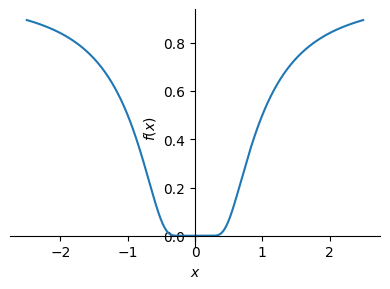

In [15]:
p = plot(f, (x, -2.5, 2.5), size=(4,3))

In [16]:
f_prime = f.diff(x)

In [17]:
f_prime.subs(x, 0)

0

In [18]:
sp.limit(f, x, 0)

0

In [19]:
sp.diff(h, x, 0)

exp(x)

In [20]:
sp.diff(f, x, 2).subs(x, 0)

0

In [21]:
f.series(x, 0, 5)

O(x**5)

In [22]:
f.series(x, 0, 5).removeO()

0

The `f.series(x, 0, 5)` returning 0 means that the Taylor polynoial of degree 4 for $f$ at 0 is identically zero; therefore all derivatives of order < 5 at 0 vanish. This does **not** mean $f$ is well-approximated by it's taylore series near 0! $f$ is a flat function whose Taylor series at 0 is identically zero despite $f(x) \neq 0$ for $x \neq 0$

-----------------------------------

#### 8.5 Compute the Taylor series for $f(x) = \sqrt(1 + x^2)$ at $x = 0$

In [23]:
x = symbols('x', real=True)

f = sp.sqrt(1 + x**2)
f

sqrt(x**2 + 1)

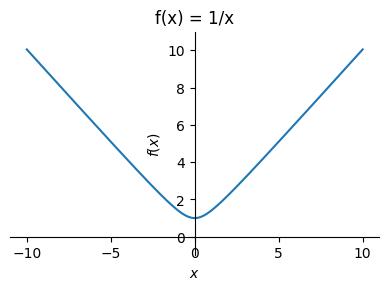

In [24]:
p = plot(f, (x, -10, 10), title="f(x) = 1/x", show=True, size=(4,3), xlim=(-11, 11), ylim=(-1, 11), axis_center=(0,0))

In [25]:
f.series(x, 0, 7)

1 + x**2/2 - x**4/8 + x**6/16 + O(x**7)

##### *Recognize* $\sqrt(1 + x^2)$ *as a binomial* $(1 + u)^\alpha$ and the binomial series $\sum_{k=0}^{\infty}\binom{\alpha}{k}u^k$

In [26]:
u, x, a, k = symbols('u x a k', real=True)

expr = (1 + u)**a
expr

(u + 1)**a

In [27]:
bs = sp.binomial(a, k)*u**k
bs

u**k*binomial(a, k)

In [28]:
[bs.subs({a:1/2, k:i, u:x**2}) for i in range(4)]

[1, 0.5*x**2, -0.125*x**4, 0.0625*x**6]

In [29]:
# taylor series f^(n)(a) / n! * (x - a)^n
# the kth derivative of f at 0 (f'(0)) / k! * (x - a)^k

x = symbols('x', real=True)

f = sp.sqrt(1 + x**2)

terms = [(f.diff(x, k).subs(x, 0) / sp.factorial(k)) * x**(k) for k in range(0, 7, 1)]
sp.Add(*terms)

x**6/16 - x**4/8 + x**2/2 + 1

In [30]:
sp.Add(*terms) - f.series(x, 0, 7).removeO()

0

-----------------------------------

#### 8.6 Compute the limit for $f(x) = x \sin(1/x)$
Look up the "Squeeze Theorem"

In [32]:
x = symbols('x', real=True)

f = x * sp.sin(1/x)
f

x*sin(1/x)

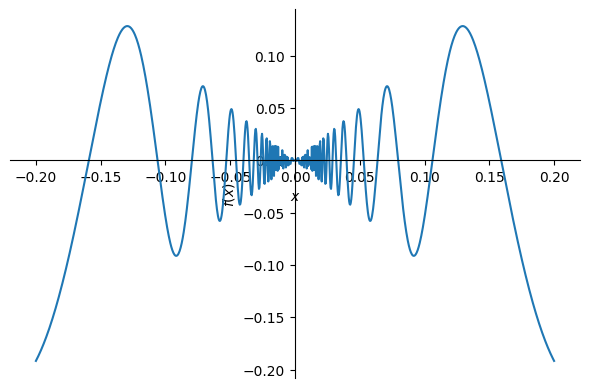

In [45]:
p = plot(f, (x, -0.2, 0.2), size=(6,4))

In [39]:
sp.limit(f, x, 0)

0